In [72]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [73]:
import chardet

with open("jogurt_kefir_synchr.csv", "rb") as f:
    result = chardet.detect(f.read())
    print(result['encoding'])  # Wyświetla wykryte kodowanie

ISO-8859-1


In [74]:
data = pd.read_csv('jogurt_kefir_synchr.csv', encoding="ISO-8859-1", low_memory=False, nrows=362)
data.head()

,jort naturalny_pocz¹tek_SYN_30.00,Unnamed: 1,jort naturalny_pocz¹tek_SYN_40.00,Unnamed: 3,jort naturalny_pocz¹tek_SYN_50.00,Unnamed: 5,jort naturalny_pocz¹tek_SYN_60.00,Unnamed: 7,jort naturalny_pocz¹tek_SYN_70.00,Unnamed: 9,...,Unnamed: 471,kefir_zamkniêty_1t2_SYN_70.00,Unnamed: 473,kefir_zamkniêty_1t2_SYN_80.00,Unnamed: 475,kefir_zamkniêty_1t2_SYN_90.00,Unnamed: 477,kefir_zamkniêty_1t2_SYN_100.00,Unnamed: 479,Unnamed: 480
0,Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),...,Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),Wavelength (nm),Intensity (a.u.),NaN
1,240,6.807383537,240,5.872513294,240,14.46979809,240,43.99132538,240,96.6428299,...,37.85584641,240,88.72745514,240,137.9709015,240,169.0362854,240,166.5380249,NaN
2,240.9299927,6.575760365,240.9299927,5.819108486,240.9299927,14.51586342,240.9299927,44.43400574,240.9299927,96.22018433,...,37.70093918,240.9299927,88.04977417,240.9299927,132.1060028,240.9299927,163.853775,240.9299927,163.8574524,NaN
3,242.0299988,6.337492943,242.0299988,6.034695148,242.0299988,14.70676041,242.0299988,44.02709198,242.0299988,93.86083221,...,38.18575668,242.0299988,87.74004364,242.0299988,130.4034729,242.0299988,156.566803,242.0299988,154.5944061,NaN
4,242.9600067,5.874998093,242.9600067,6.193667889,242.9600067,15.44167328,242.9600067,45.18645859,242.9600067,95.20815277,...,39.49874496,242.9600067,89.29292297,242.9600067,129.0093231,242.9600067,155.1316833,242.9600067,150.4667053,NaN


In [75]:
import re

# Słownik zamienników dla skrótów na pełne nazwy
replacements = {
    "jort": "jogurt",
    "pocz¹tek": "początek",  # Poprawka nieprawidłowych znaków
    "zamkniêty" : "zamknięty", # Możesz dodać więcej zamienników, jeśli to potrzebne
    "jog nat_początek2" : "jogurt naturalny_początek5",
    "jog nat_początek1" : "jogurt naturalny_początek4",
    "jog nat_początek" : "jogurt naturalny_początek3",  
    "jog trusk_początek2" : "jogurt truskawka_początek5",
    "jog trusk_początek1" : "jogurt truskawka_początek4",
    "jog trusk_początek" : "jogurt truskawka_początek3",    
    "jog nat" : "jogurt naturalny",
    "jog trusk" : "jogurt truskawka"
}

# Funkcja, która dokonuje zamiany na pełne nazwy, zachowując liczby
def replace_name(name):
    # Znajdujemy liczbę na końcu (jeśli występuje) i przechowujemy ją
    match = re.search(r'(\d)$', name)
    number = match.group(0) if match else ""
    
    # Usuwamy liczbę z nazwy, aby dokonać zamian tekstowych
    base_name = name[:-1] if number else name
    
    # Dokonujemy zamiany na podstawie słownika
    for old, new in replacements.items():
        base_name = base_name.replace(old, new)
    
    # Dodajemy liczbę z powrotem do końca nazwy, jeśli była
    return base_name + number

# Zastosowanie funkcji do każdej kolumny
data.columns = [replace_name(col).replace(" ", "_") for col in data.columns]

# Sprawdzenie wynikowych nazw kolumn
print(data.columns)


Index(['jogurt_naturalny_początek_SYN_30.00', 'Unnamed:_1',
       'jogurt_naturalny_początek_SYN_40.00', 'Unnamed:_3',
       'jogurt_naturalny_początek_SYN_50.00', 'Unnamed:_5',
       'jogurt_naturalny_początek_SYN_60.00', 'Unnamed:_7',
       'jogurt_naturalny_początek_SYN_70.00', 'Unnamed:_9',
       ...
       'Unnamed:_471', 'kefir_zamknięty_1t2_SYN_70.00', 'Unnamed:_473',
       'kefir_zamknięty_1t2_SYN_80.00', 'Unnamed:_475',
       'kefir_zamknięty_1t2_SYN_90.00', 'Unnamed:_477',
       'kefir_zamknięty_1t2_SYN_100.00', 'Unnamed:_479', 'Unnamed:_480'],
      dtype='object', length=481)


In [76]:
"""
def split_column_names(df):
    # Wyrażenie regularne
    pattern = r'(\w+?)(?:_(\d+t\d+))?_SYN_(\d+)'
    
    # Lista nowych wierszy
    new_data = []

    for col in df.columns:
        # Dopasowanie wyrażenia do nazwy kolumny
        match = re.match(pattern, col)
        
        # Wyodrębnienie grup
        if match:
            nazwa = match.group(1)  # [NAZWA]
            t = match.group(2) if match.group(2) else ''  # [T], jeśli jest
            dl = match.group(3)  # [dL]
            
            # Dodanie nowych kolumn do DataFrame
            new_data.append([nazwa, t, dl])

    # Przekształcenie listy w nowy DataFrame
    new_df = pd.DataFrame(new_data, columns=['Nazwa', 'Czas', 'dL'])
    
    # Tworzymy DataFrame z wartościami od 240 do 600 (włącznie)
    additional_columns = pd.DataFrame(np.nan, index=new_df.index, columns=[str(i) for i in range(240, 601)])
    
    # Łączenie nowego DataFrame z dodatkowymi kolumnami
    final_df = pd.concat([new_df, additional_columns], axis=1)
    
    return final_df

# Przykład użycia funkcji
result = split_column_names(data)
result.iloc[120:180]
"""

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\siwie\AppData\Local\Temp\ipykernel_11952\1127389412.py:1: SyntaxWarning: invalid escape sequence '\w'
  """


"\ndef split_column_names(df):\n    # Wyrażenie regularne\n    pattern = r'(\\w+?)(?:_(\\d+t\\d+))?_SYN_(\\d+)'\n    \n    # Lista nowych wierszy\n    new_data = []\n\n    for col in df.columns:\n        # Dopasowanie wyrażenia do nazwy kolumny\n        match = re.match(pattern, col)\n        \n        # Wyodrębnienie grup\n        if match:\n            nazwa = match.group(1)  # [NAZWA]\n            t = match.group(2) if match.group(2) else ''  # [T], jeśli jest\n            dl = match.group(3)  # [dL]\n            \n            # Dodanie nowych kolumn do DataFrame\n            new_data.append([nazwa, t, dl])\n\n    # Przekształcenie listy w nowy DataFrame\n    new_df = pd.DataFrame(new_data, columns=['Nazwa', 'Czas', 'dL'])\n    \n    # Tworzymy DataFrame z wartościami od 240 do 600 (włącznie)\n    additional_columns = pd.DataFrame(np.nan, index=new_df.index, columns=[str(i) for i in range(240, 601)])\n    \n    # Łączenie nowego DataFrame z dodatkowymi kolumnami\n    final_df = pd.c

In [77]:
def split_column_names(df):
    # Zaktualizowane wyrażenie regularne
    pattern = r'(\w+(?:_\w+)*?)_(początek|otwarty|zamknięty)([1-5]?)(?:_(\d+t\d*\d*))?_SYN_(30|40|50|60|70|80|90|100)'

    # Lista nowych wierszy
    new_data = []

    for col in df.columns:
        # Dopasowanie wyrażenia do nazwy kolumny
        match = re.match(pattern, col)
        
        # Wyodrębnienie grup
        if match:
            nazwa = match.group(1)  # [Nazwa]
            status = match.group(2)  # [Status]
            sample_number = match.group(3) if match.group(3) else '0'  # [SampleNumber]
            czas = match.group(4) if match.group(4) else '0'  # [Czas], jeśli jest
            dl = match.group(5)  # [dL]
            
            # Wyodrębnienie numeru próbki z [Czas]
            if re.match(r'\d+t\d*\d*', czas):
                sample_number_in_time = re.match(r'\d+t(\d*\d*)', czas).group(1)
                sample_number = sample_number_in_time if sample_number_in_time else '0'
                
                # Usuń numer próbki z [Czas]
                czas = re.sub(r'(\d+t)\d*', r'\1', czas)
            else:
                sample_number_in_time = '0'
            
            # Dodanie nowych kolumn do DataFrame
            new_data.append([nazwa, status, sample_number, czas, dl])

    # Przekształcenie listy w nowy DataFrame
    new_df = pd.DataFrame(new_data, columns=['Nazwa', 'Status', 'Numer', 'Czas', 'dL'])
    
    # Tworzymy DataFrame z wartościami od 240 do 600 (włącznie)
    additional_columns = pd.DataFrame(np.nan, index=new_df.index, columns=[str(i) for i in range(240, 601)])
    
    # Łączenie nowego DataFrame z dodatkowymi kolumnami
    final_df = pd.concat([new_df, additional_columns], axis=1)
    
    return final_df


result = split_column_names(data)
result.iloc[60:120]



,Nazwa,Status,Numer,Czas,dL,240,241,242,243,244,...,591,592,593,594,595,596,597,598,599,600
60,kefir,początek,1,0,70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,kefir,początek,1,0,80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,kefir,początek,1,0,90,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,kefir,początek,1,0,100,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,kefir,początek,2,0,30,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,kefir,początek,2,0,40,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,kefir,początek,2,0,50,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,kefir,początek,2,0,60,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,kefir,początek,2,0,70,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,kefir,początek,2,0,80,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
data = data.iloc[1:]

# Filtrujemy kolumny "Unnamed:_i" zawierające nieparzyste liczby do 479
unnamed_columns = [col for col in data.columns if re.match(r'Unnamed:_\d+', col) and int(col.split('_')[1]) % 2 != 0 and int(col.split('_')[1]) <= 479]

# Przekształcenie kolumn na wektory wierszowe
unnamed_data = data[unnamed_columns].T

unnamed_data


,1,2,3,4,5,6,7,8,9,10,...,352,353,354,355,356,357,358,359,360,361
Unnamed:_1,6.807383537,6.575760365,6.337492943,5.874998093,6.292390347,6.302236557,6.19797802,6.248193741,6.175237656,6.482236385,...,14.23722553,14.14950371,14.05822659,14.00384235,13.85585117,13.66411972,13.92471123,13.27398205,13.28486443,13.08647633
Unnamed:_3,5.872513294,5.819108486,6.034695148,6.193667889,6.300446033,6.907976627,7.484288216,8.164666176,8.810825348,9.95917511,...,10.75729942,10.62443447,10.48354721,10.27874374,10.04849243,9.615001678,9.413671494,9.385579109,9.076517105,9.234862328
Unnamed:_5,14.46979809,14.51586342,14.70676041,15.44167328,16.47039223,18.27847481,20.48888206,23.03216362,25.85910797,29.94274902,...,7.794281006,7.683727741,7.593907356,7.426756859,7.369203091,7.073904037,6.971441746,7.067602634,6.831822395,7.009384632
Unnamed:_7,43.99132538,44.43400574,44.02709198,45.18645859,46.99568176,51.68450165,54.99927902,62.62075806,67.26333618,76.08338928,...,6.422884464,6.349466801,6.395228863,6.441860676,6.0557971,6.073560238,6.089416504,6.155488968,6.170433998,6.173687458
Unnamed:_9,96.6428299,96.22018433,93.86083221,95.20815277,96.25804901,100.1037216,106.5281372,114.0929871,119.0864182,127.7928467,...,5.571760178,5.459169865,5.141180038,5.046103477,4.840631485,4.724726677,4.831632137,4.774603367,4.721427917,4.832276821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed:_471,37.85584641,37.70093918,38.18575668,39.49874496,41.1194191,45.39390564,49.08202744,55.00750351,60.92284393,68.32164764,...,6.006772518,6.369987488,6.249031544,6.14475584,5.93338728,5.724193573,5.805604935,5.930305004,6.032066822,6.007106781
Unnamed:_473,88.72745514,88.04977417,87.74004364,89.29292297,92.00081635,95.6894989,99.54130554,105.8625259,112.5192184,119.709671,...,5.308765888,5.307658195,5.313938618,5.023534775,4.965129375,4.71092701,4.786479473,4.753100872,4.714488029,4.683124065
Unnamed:_475,137.9709015,132.1060028,130.4034729,129.0093231,130.1441803,133.6662903,136.6669006,141.5376129,145.8595581,153.1473999,...,4.338282108,4.406634808,4.249993801,4.072494984,4.175283909,4.124426365,3.966687918,3.944416761,4.086024284,4.046385288
Unnamed:_477,169.0362854,163.853775,156.566803,155.1316833,153.6738892,155.7506409,158.6682587,161.4794922,165.4479523,170.7408447,...,3.796288729,3.954292297,3.798935652,3.556658983,3.503906012,3.314920425,3.197596788,3.417053461,3.310971022,3.417898178


In [79]:
result.shape

(240, 366)

In [80]:
unnamed_data.shape

(240, 361)

In [81]:
# Uzupełnienie nowego DataFrame wartościami z kolumn "Unnamed:_i"
for i, col in enumerate(range(240, 601)): 
    result[str(col)] = unnamed_data.iloc[:, i].values

result.head()

,Nazwa,Status,Numer,Czas,dL,240,241,242,243,244,...,591,592,593,594,595,596,597,598,599,600
0,jogurt_naturalny,początek,0,0,30,6.807383537,6.575760365,6.337492943,5.874998093,6.292390347,...,14.23722553,14.14950371,14.05822659,14.00384235,13.85585117,13.66411972,13.92471123,13.27398205,13.28486443,13.08647633
1,jogurt_naturalny,początek,0,0,40,5.872513294,5.819108486,6.034695148,6.193667889,6.300446033,...,10.75729942,10.62443447,10.48354721,10.27874374,10.04849243,9.615001678,9.413671494,9.385579109,9.076517105,9.234862328
2,jogurt_naturalny,początek,0,0,50,14.46979809,14.51586342,14.70676041,15.44167328,16.47039223,...,7.794281006,7.683727741,7.593907356,7.426756859,7.369203091,7.073904037,6.971441746,7.067602634,6.831822395,7.009384632
3,jogurt_naturalny,początek,0,0,60,43.99132538,44.43400574,44.02709198,45.18645859,46.99568176,...,6.422884464,6.349466801,6.395228863,6.441860676,6.0557971,6.073560238,6.089416504,6.155488968,6.170433998,6.173687458
4,jogurt_naturalny,początek,0,0,70,96.6428299,96.22018433,93.86083221,95.20815277,96.25804901,...,5.571760178,5.459169865,5.141180038,5.046103477,4.840631485,4.724726677,4.831632137,4.774603367,4.721427917,4.832276821


           PC1         PC2             Nazwa Czas   dL
0   251.301939 -907.135035  jogurt_naturalny    0   30
1   864.543436 -505.971747  jogurt_naturalny    0   40
2  1139.051760   -8.220686  jogurt_naturalny    0   50
3   936.668306  442.782245  jogurt_naturalny    0   60
4   540.726787  715.261022  jogurt_naturalny    0   70
5    18.866515  757.240038  jogurt_naturalny    0   80
6  -466.426039  647.629973  jogurt_naturalny    0   90
7  -856.020235  389.695721  jogurt_naturalny    0  100


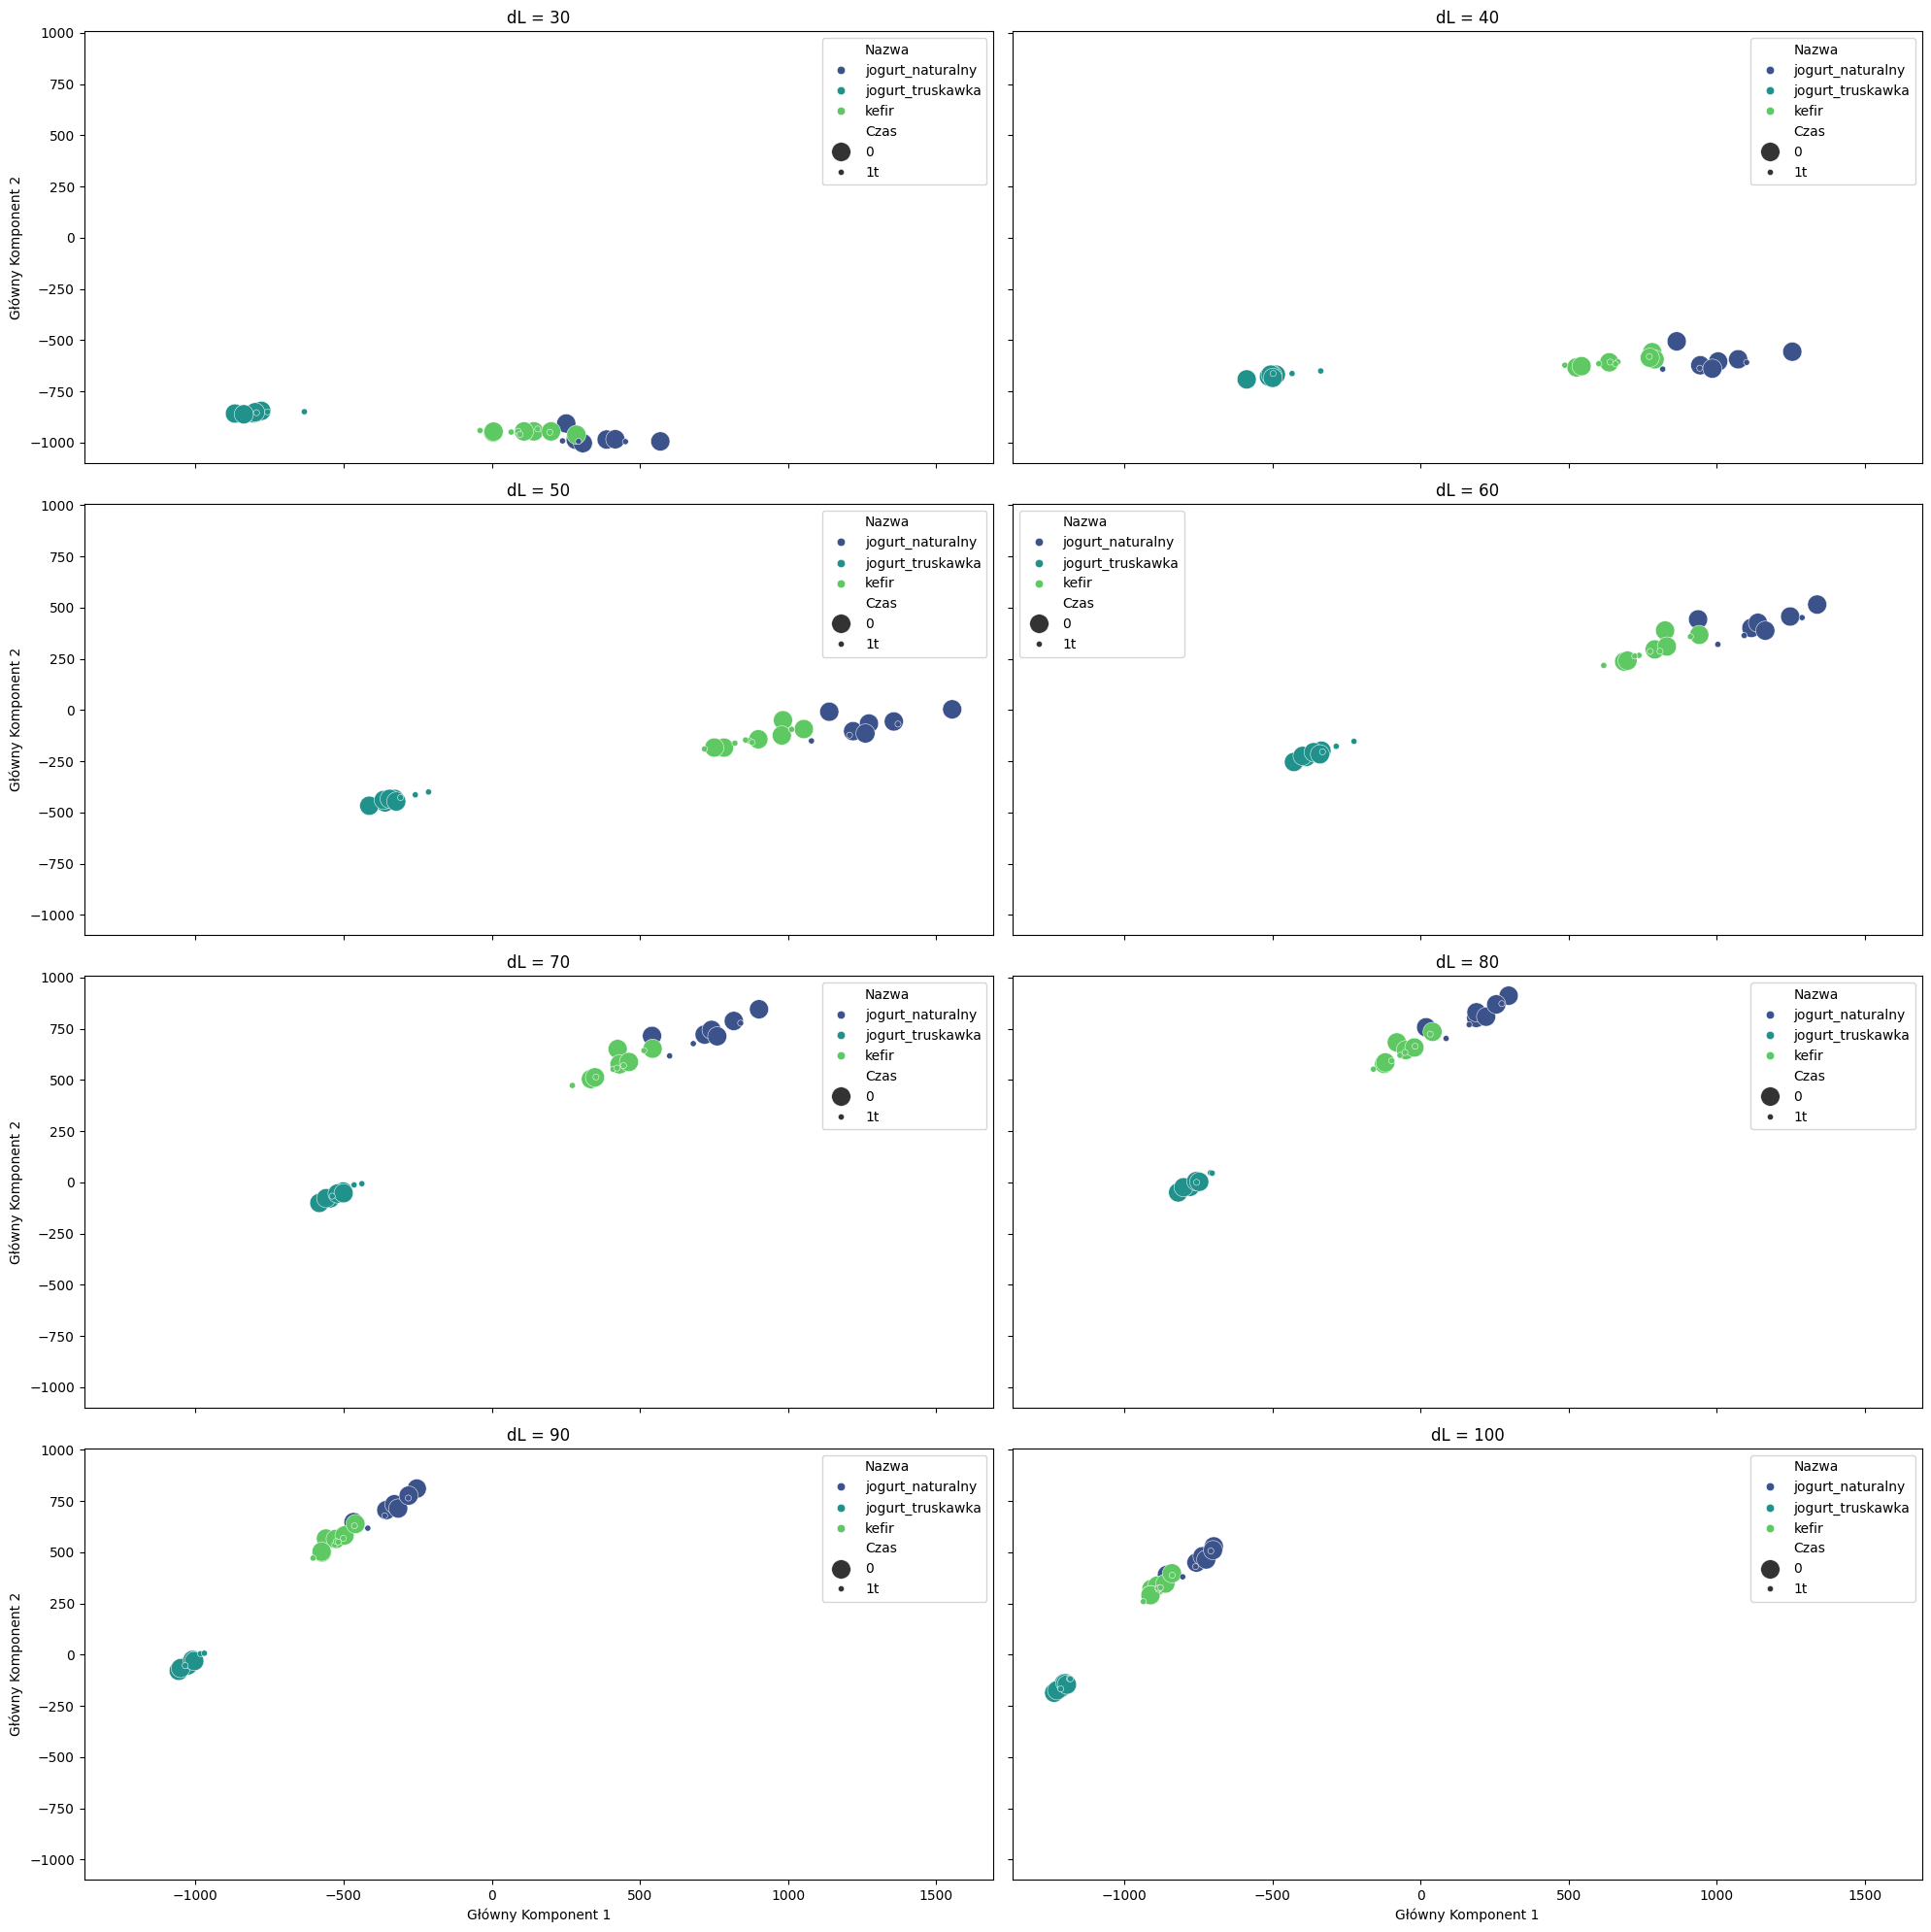

In [85]:
# PCA

from sklearn.decomposition import PCA

# Zakładam, że Twoje dane mają już kolumny podzielone na Nazwa, Czas, dL i wartości od 240 do 600.
X = result.drop(columns=['Nazwa', 'Status', 'Numer', 'Czas', 'dL'])
labels = result[['Nazwa', 'Czas', 'dL']]

# Tworzenie modelu PCA i dostosowanie do danych
pca = PCA(n_components=2)  # Redukcja do 2 głównych komponentów dla wizualizacji
principal_components = pca.fit_transform(X)

# Tworzenie DataFrame z głównymi komponentami
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Dodanie etykiet do DataFrame
pca_df = pd.concat([pca_df, labels], axis=1)

# Wyświetlenie głównych komponentów
print(pca_df.head(8))

# Tworzenie subplota dla różnych wartości dL
unique_dl = pca_df['dL'].unique()
n_subplots = len(unique_dl)

fig, axes = plt.subplots((n_subplots + 1) // 2, 2, figsize=(20, 20), sharex=True, sharey=True)

for ax, dl in zip(axes.flatten(), unique_dl):
    subset = pca_df[pca_df['dL'] == dl]
    sns.scatterplot(x='PC1', y='PC2', hue='Nazwa', size='Czas', data=subset, ax=ax, palette='viridis', sizes=(20, 200))
    ax.set_title(f'dL = {dl}')
    ax.set_xlabel('Główny Komponent 1')
    ax.set_ylabel('Główny Komponent 2')

plt.tight_layout()
plt.show()


          LD1        LD2             Nazwa Czas  dL
0  115.075103 -17.041294  jogurt_naturalny    0  30
1   19.750096  68.724386  jogurt_naturalny    0  40
2  -30.514362  50.090590  jogurt_naturalny    0  50
3  -37.654185 -18.922719  jogurt_naturalny    0  60
4  -10.167421 -30.976205  jogurt_naturalny    0  70


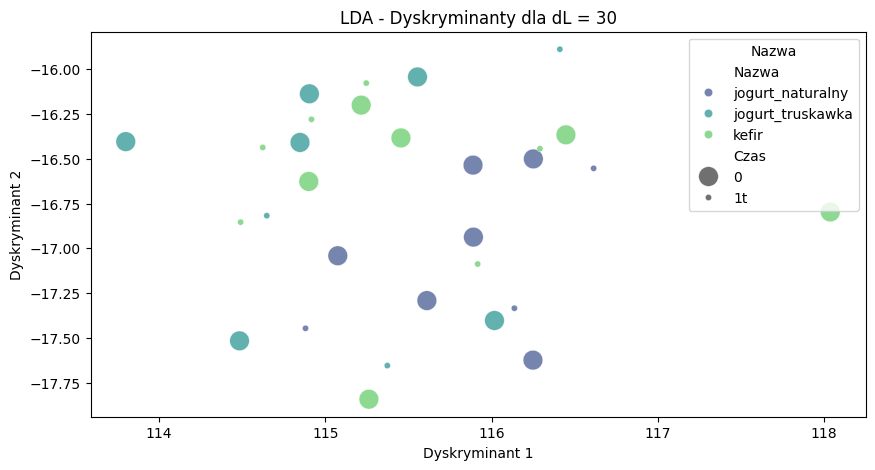

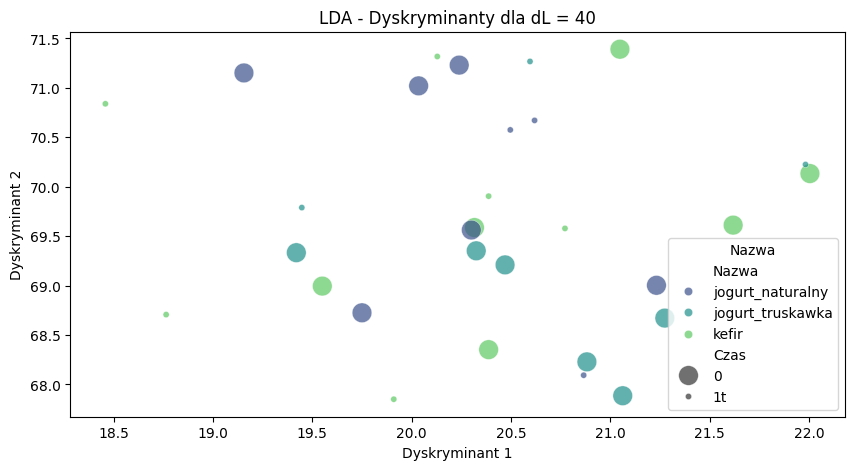

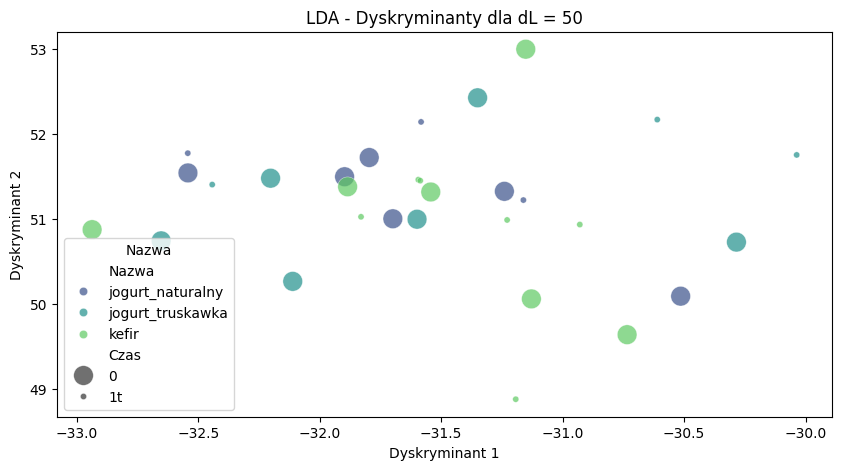

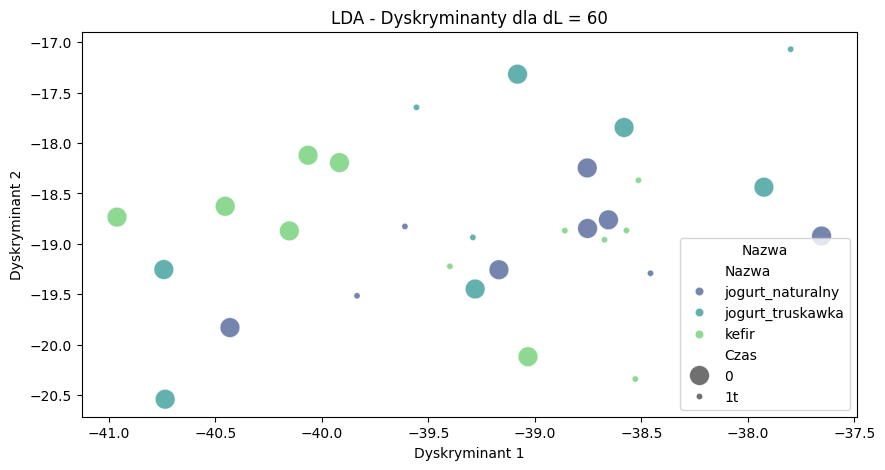

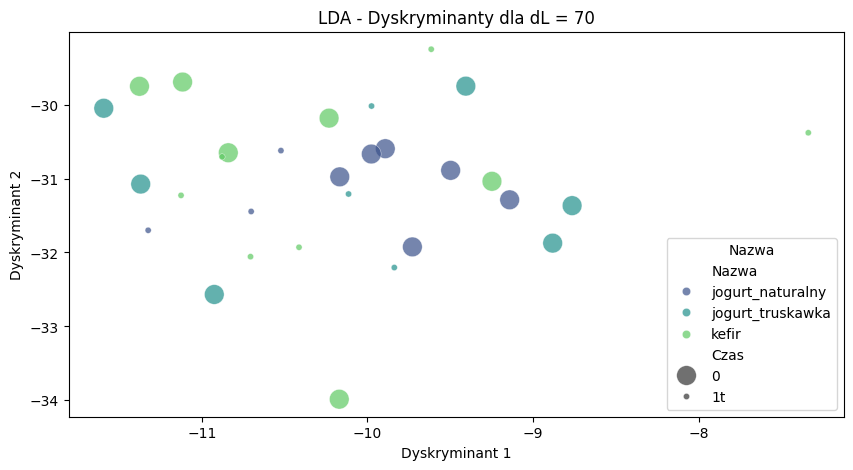

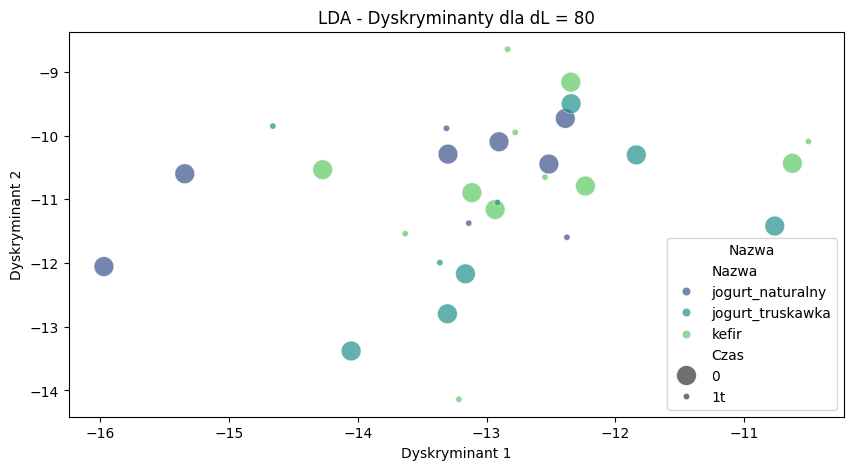

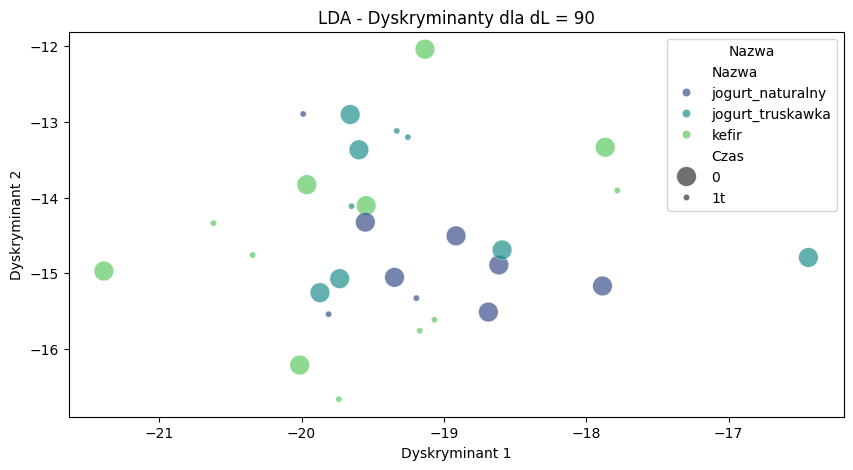

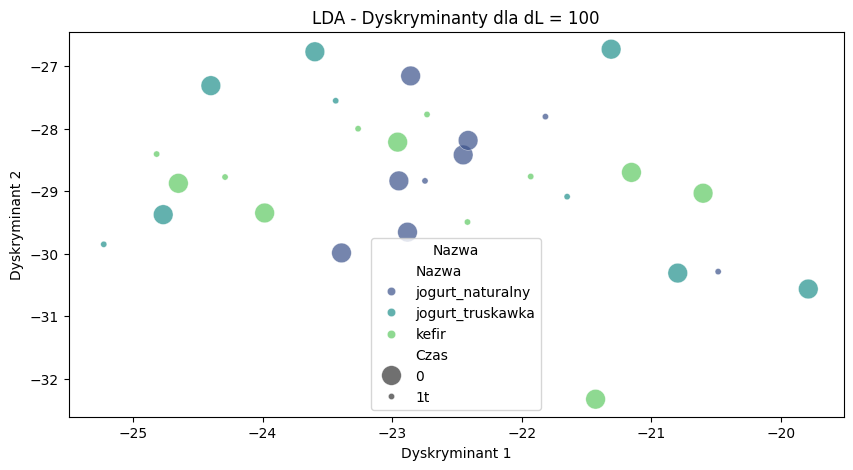

In [86]:
# LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Zakładam, że Twoje dane mają już kolumny podzielone na Nazwa, Czas, dL i wartości od 240 do 600.
# Zakładam też, że chcesz zachować Nazwa jako etykietę, a resztę zredukować.
X = result.drop(columns=['Nazwa', 'Status', 'Numer', 'Czas', 'dL'])
y = result['dL']  # Zakładamy, że 'NAZWA' to kolumna etykiet

# Tworzenie modelu LDA i dostosowanie do danych
lda = LDA(n_components=2)  # Redukcja do 2 dyskryminantów dla wizualizacji
lda_components = lda.fit_transform(X, y)

# Tworzenie DataFrame z dyskryminantami
lda_df = pd.DataFrame(data=lda_components, columns=['LD1', 'LD2'])

# Dodanie etykiet do DataFrame 
lda_df = pd.concat([lda_df, result[['Nazwa', 'Czas', 'dL']]], axis=1)

# Wyświetlenie dyskryminantów
print(lda_df.head())

# Tworzenie subplota dla różnych wartości dL
unique_dl = lda_df['dL'].unique()

for dl in unique_dl:
    plt.figure(figsize=(10, 5))
    subset = lda_df[lda_df['dL'] == dl]
    sns.scatterplot(x='LD1', y='LD2', hue='Nazwa', size='Czas', data=subset, palette='viridis', sizes=(20, 200), legend='brief', alpha=0.7)
    plt.title(f'LDA - Dyskryminanty dla dL = {dl}')
    plt.xlabel('Dyskryminant 1')
    plt.ylabel('Dyskryminant 2')
    plt.legend(title='Nazwa')
    plt.show()